# K- Means Clustering
## Author: Rizul Sharma

### About the dataset

* This dataset contains 3 classes of 50 instances each and each class refers to a type of iris plant.
* The dataset has four features: sepal length, sepal width, petal length, and petal width.
* The fifth column is for species, which holds the value for these types of plants.

This notebook will walk through K-Means Clustering.

In [63]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
import warnings                                                                 
warnings.filterwarnings('ignore')

# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [64]:
iris_df.shape

(150, 4)

In [65]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


### Data Pre-processing

In [66]:
iris_df.isnull().sum() #check for missing values

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

#### How do you find the optimum number of clusters for K Means? How does one determine the value of K?
For that I used the Elbow method

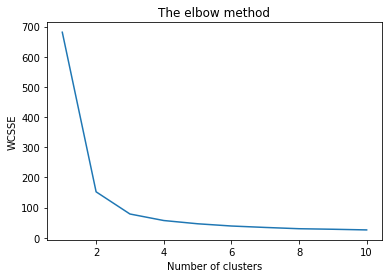

In [67]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcsse = [] # Within-Cluster Sum of Squared Errors

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcsse.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcsse)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSSE') # Within cluster sum of squares
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squared errors (WCSSE) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as ** '3**'.

In [68]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

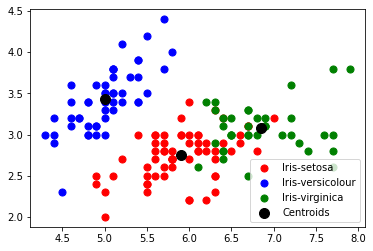

In [69]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 50, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()

In [70]:
lab = kmeans.labels_
print(lab)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [71]:
iris_df['kmeans_labels']=lab
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),kmeans_labels
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


### Visualization with labels

<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>

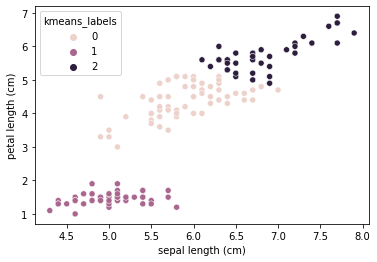

In [72]:
import seaborn as sns
sns.scatterplot(iris_df['sepal length (cm)'],iris_df['petal length (cm)'],hue=iris_df['kmeans_labels'])

### Silhouette Score

In [73]:
silhouette_score(iris_df,kmeans.labels_)

0.6851559988597147

* K means cluster with 3 groups classified our dataset into three groups 0 , 1 , 2
* Lets us check for the Accuracy of our clustering by building model with Desicion Tree Classifier

In [74]:
df = pd.read_csv('Iris.csv') #load the dataset with original labels
df['kmeans_labels']=lab #add kmeans labels
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,kmeans_labels
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


In [75]:
df['kmeans_labels'].value_counts()

0    62
1    50
2    38
Name: kmeans_labels, dtype: int64

In [76]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### Decision Tree Classifier

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species', 'kmeans_labels'],
      dtype='object')

In [78]:
ip = df.iloc[:, [0, 1, 2, 3]].values
op = df['kmeans_labels']

In [79]:
xtrain,xtest,ytrain,ytest = train_test_split(ip,op,test_size = 0.2 , random_state =0)
DT = DecisionTreeClassifier(max_depth=50,random_state=0)
DT.fit(xtrain,ytrain)
ypred = DT.predict(xtest)
print('Accuracy of K Means Clustering:',round(DT.score(xtest,ytest)*100,2),'%')

Accuracy of K Means Clustering: 96.67 %


## Conclusion
* We classified our Iris dataset in 3 groups by K Means clustering
* Accuracy of our Clustering determined by Decision Tree Classifier is 96.67 %